In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [2]:
figshare_wb = pd.read_csv('../data/figshare-blots.csv')

In [3]:
figshare_wb.columns

Index(['compression', 'pi', 'tres-flive', 'maniqa-pipal', 'pixelation',
       'has_text', 'width', 'height', 'article_id', 'file_id', 'niqe',
       'image_name'],
      dtype='object')

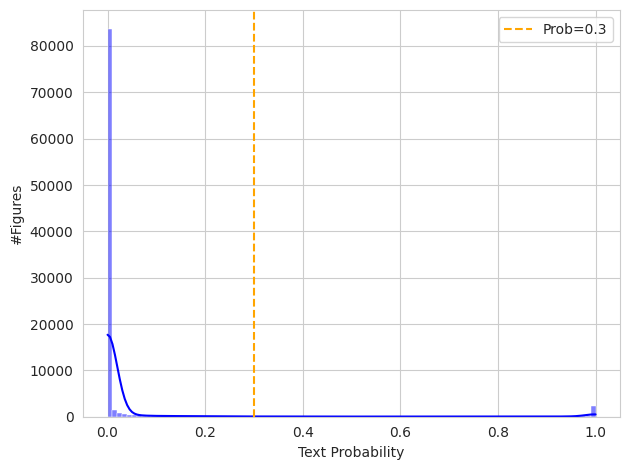

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart
# all bins higher then 0.3 should be displayed in red
# all bins lower then 0.3 should be displayed in blue

sns.histplot(data=figshare_wb, x='has_text', kde=True, color='blue', bins=100)
plt.axvline(x=0.3, color='orange', linestyle='--', label=f'Prob=0.3')

plt.ylabel('#Figures')
plt.xlabel('Text Probability')
plt.legend()

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.savefig('../results/figshare-analysis/ocr-threshold.pdf', dpi=100)
plt.show()

In [5]:
len(figshare_wb[figshare_wb['has_text'] > 0.3])

4901

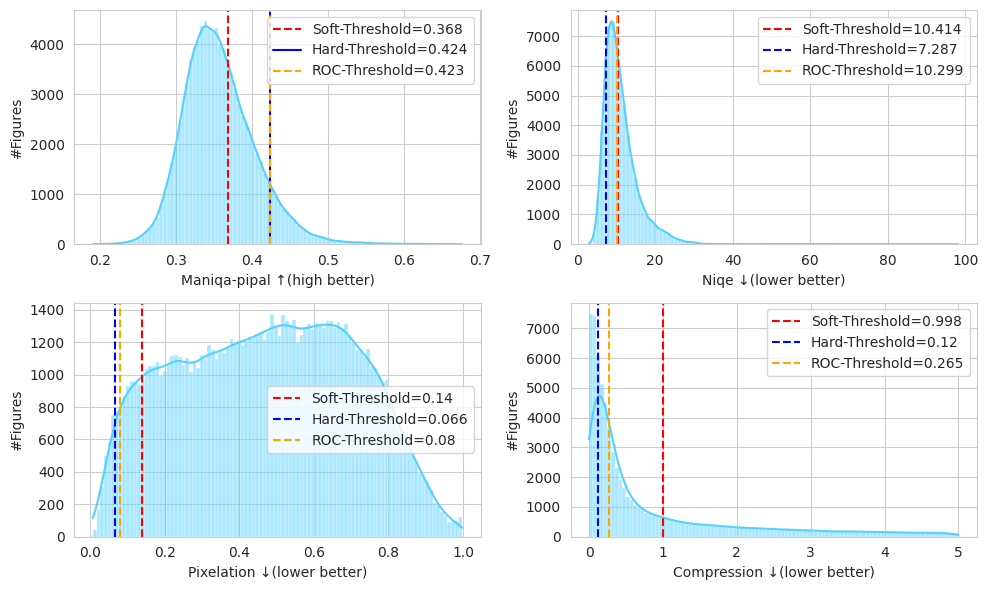

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
# sns.set_theme(rc={'figure.figsize':(, 10), 'font.size':23, 'axes.titlesize':23, 'axes.labelsize':23, 'xtick.labelsize':20, 'ytick.labelsize':20, 'legend.fontsize':20, 'legend.title_fontsize':23})
sns.set_style('whitegrid')
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
ax = ax.flatten()

# Plot the bar chart
# all bins higher then 0.3 should be displayed in red
# all bins lower then 0.3 should be displayed in blue
def plot(metric, st, roct, ht, axis):
    # remove data outlier
    data = figshare_wb.copy()
    if metric == "niqe":
        data = figshare_wb[figshare_wb[metric] < 100]

    if metric == "compression":
        data = figshare_wb[figshare_wb[metric] < 5]
    sns.histplot(data=data, x=metric, kde=True, color='#55d0ff', bins=100, ax=axis)
    axis.axvline(x=st, color='red', linestyle='--', label=f'Soft-Threshold={st}')
    if metric == "maniqa-pipal":
        axis.axvline(x=ht, color='blue', linestyle='-', label=f'Hard-Threshold={ht}')    
    else:
        axis.axvline(x=ht, color='blue', linestyle='--', label=f'Hard-Threshold={ht}')
    axis.axvline(x=roct, color='orange', linestyle='--', label=f'ROC-Threshold={roct}')
    axis.set_ylabel('#Figures')
    if metric == "maniqa-pipal":
        metric = "MANIQA-PIPAL ↑(high better)"
    elif metric == "niqe":
        metric = "NIQE ↓(lower better)"
    elif metric == "compression":
        metric = "Compression ↓(lower better)"
    elif metric == "pixelation":
        metric = "Pixelation ↓(lower better)"
    axis.set_xlabel(f'{metric.capitalize()}')
    axis.legend()

plot("maniqa-pipal", 0.368, 0.423, 0.424, ax[0])
plot("niqe", 10.414, 10.299, 7.287, ax[1])
plot("pixelation", 0.140, 0.080, 0.066, ax[2])
plot("compression", 0.998,  0.265, 0.120, ax[3])
# Show plot
plt.tight_layout()
plt.savefig('../results/figshare-analysis/quality-thresholds.pdf', dpi=100)
plt.show()

In [7]:
def n_images(metric, threshold):
    if metric == "maniqa-pipal":
        return len(figshare_wb[figshare_wb[metric] > threshold])
    return len(figshare_wb[figshare_wb[metric] < threshold])

print("maniqa-pipal", n_images("maniqa-pipal", 0.368), n_images("maniqa-pipal", 0.423), n_images("maniqa-pipal", 0.424))
print("niqe", n_images("niqe", 10.414), n_images("niqe", 10.299), n_images("niqe", 7.287))
print("pixelation", n_images("pixelation", 0.140), n_images("pixelation", 0.080), n_images("pixelation", 0.066))
print("compression", n_images("compression", 0.998), n_images("compression", 0.265), n_images("compression", 0.120))

maniqa-pipal 34380 8191 7974
niqe 32532 31763 8919
pixelation 8992 3378 2280
compression 52105 31860 17440


In [8]:
len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.368) & (figshare_wb['niqe'] < 10.414) &  (figshare_wb['compression'] < 0.998)])
len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.423) & (figshare_wb['niqe'] < 10.299) &  (figshare_wb['compression'] < 0.265)])
len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.424) & (figshare_wb['niqe'] < 7.287) &  (figshare_wb['compression'] < 0.120)])

1041

In [9]:
print(len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.368) & (figshare_wb['niqe'] < 10.414) &  (figshare_wb['compression'] < 0.998) & (figshare_wb['pixelation'] < 0.140)]))
print(len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.423) & (figshare_wb['niqe'] < 10.299) &  (figshare_wb['compression'] < 0.265) & (figshare_wb['pixelation'] < 0.080)]))
print(len(figshare_wb[(figshare_wb['maniqa-pipal'] > 0.424) & (figshare_wb['niqe'] < 7.287) &  (figshare_wb['compression'] < 0.120) & (figshare_wb['pixelation'] < 0.066)]))

3356
651
264


In [18]:
11.8 / 94

0.12553191489361704